In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
gold_data = pd.read_csv('./stock_data/GOLD.csv')
gold_data.columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol', 'Change_Pct', 'Pred', 'new']
gold_data.Date = pd.to_datetime(gold_data.Date)
gold_data.set_index('Date', inplace=True)
gold_data.head()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
gold_data.Vol = gold_data.Vol.str.replace('K','').astype(float)
gold_data.Vol = gold_data.Vol * 1000
gold_data.Change_Pct = gold_data.Change_Pct.str.replace('%','').astype(float)

In [4]:
gold_data.head()


,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,80.0,-1.79,738.0,117.570740
2017-05-05,28184,28136,28382,28135,60.0,0.44,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7850.0,-0.23,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10100.0,-0.49,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9280.0,0.09,124.0,112.153318


In [5]:
Pred_NaN_count = len(gold_data[gold_data.Pred.isna()])
dataset = gold_data[['Open', 'High', 'Low', 'Price', 'Pred']].iloc[:-Pred_NaN_count]
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
Pred_NaN_count

101

In [7]:
regressor.coef_


array([[ 3., -1., -4.,  2.]])

In [8]:
y_pred = regressor.predict(X_test)
score_regressor = r2_score(y_test.values, y_pred)
print("Accuracy Score in case of 'Pred' column: ", score_regressor)

Accuracy Score in case of 'Pred' column:  1.0


In [9]:
missing_Pred_values = regressor.predict(gold_data[gold_data.Pred.isna()][['Open', 'High', 'Low', 'Price']])
gold_data.loc[:,'Pred'][-Pred_NaN_count:] = missing_Pred_values.ravel()
gold_data.tail()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2019-04-26,31868,31851,31934,31705,9670.0,0.08,535.0,247.177322
2019-04-30,31625,31800,31824,31597,6440.0,-0.76,438.0,52.201158
2019-05-01,31563,31604,31657,31503,1550.0,-0.20,269.0,113.293305
2019-05-02,31203,31420,31425,31160,480.0,-1.14,601.0,48.365693
2019-05-03,31341,31250,31500,31163,80.0,0.44,280.0,429.924911


In [10]:
new_X = gold_data[['Open', 'High', 'Low', 'Price']]
new_y = gold_data.new
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)
new_regressor = LinearRegression()
new_regressor.fit(X_train, y_train)
new_regressor.coef_

array([-1.00029997,  1.0051232 , -1.01793823,  1.01303944])

In [11]:
y_pred = new_regressor.predict(X_test)
score_new_regressor = r2_score(y_test.values, y_pred)
print("Accuracy Score in case of 'new' column: ", score_new_regressor)

Accuracy Score in case of 'new' column:  0.9999901742208236


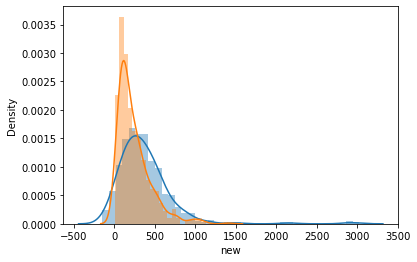

In [12]:
sns.distplot(gold_data.Pred)
sns.distplot(gold_data.new)
plt.show()

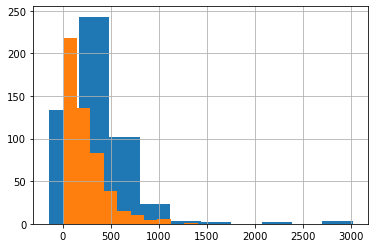

In [13]:
gold_data.Pred.hist()
gold_data.new.hist()
plt.show()

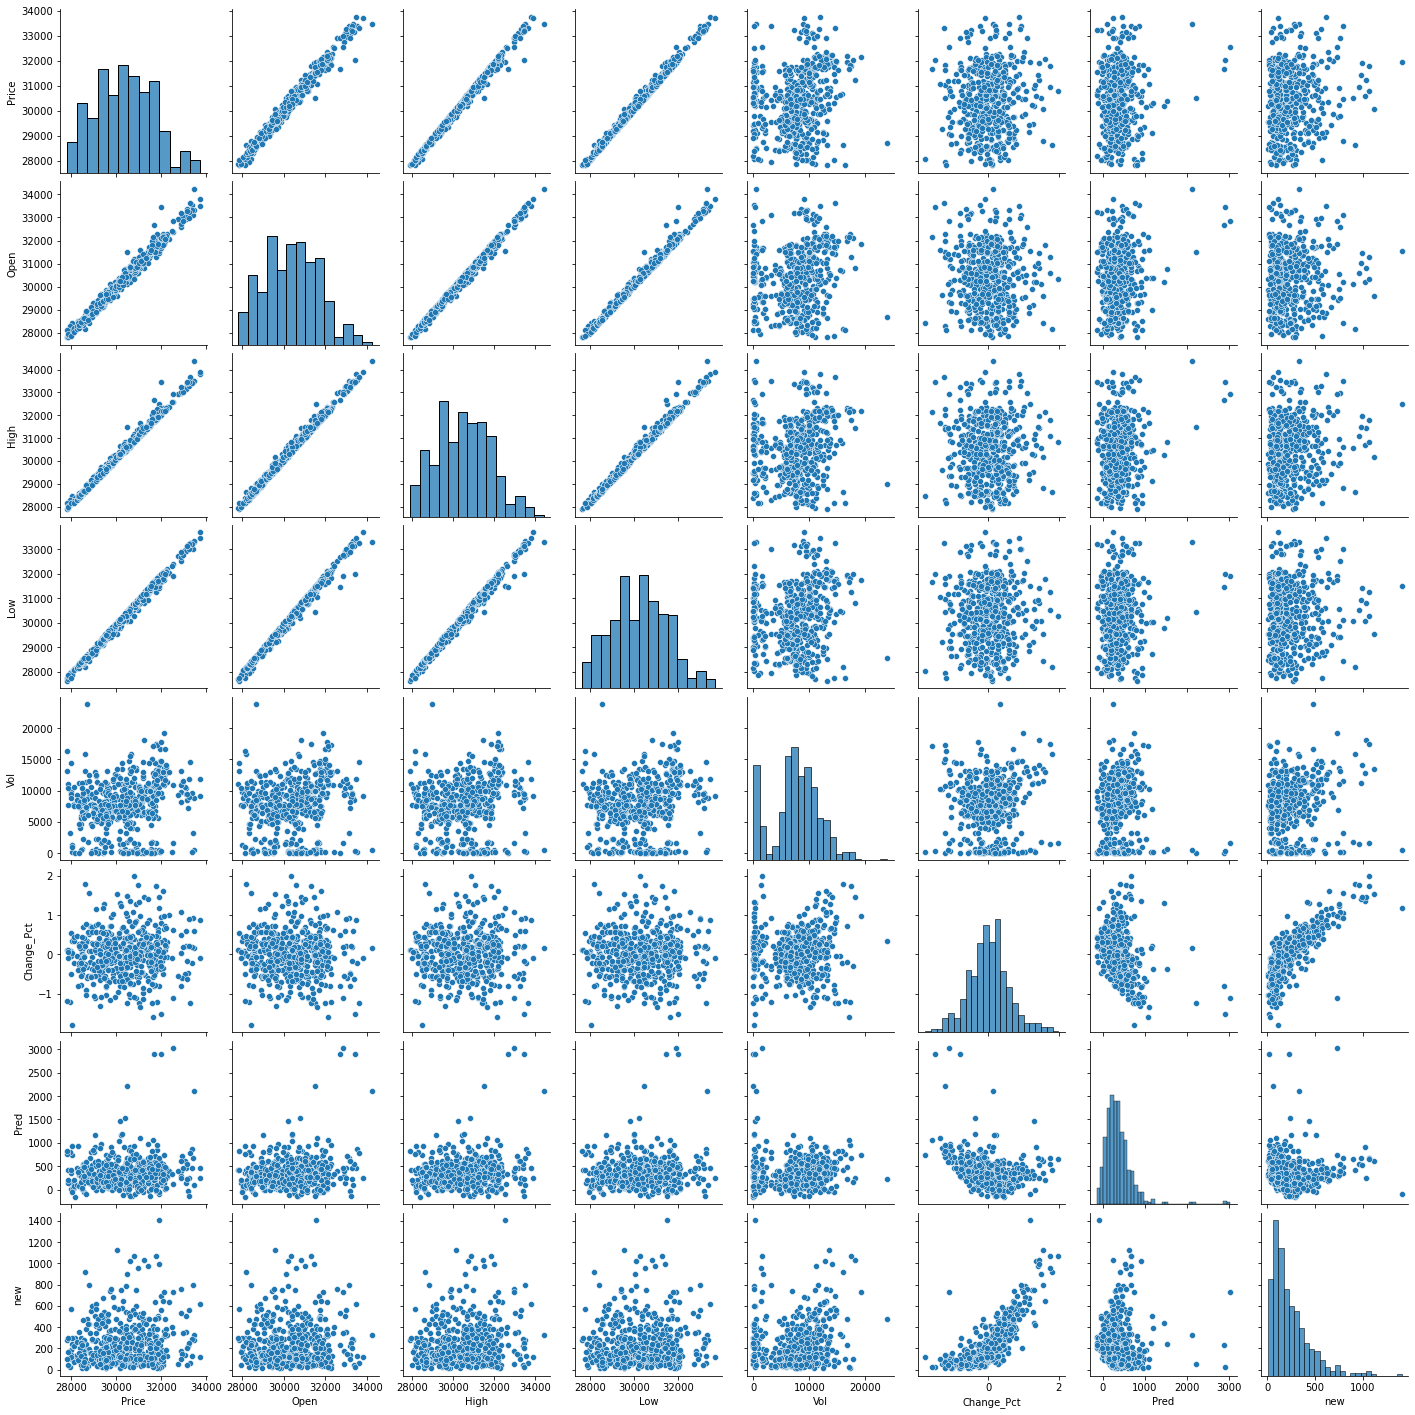

In [14]:
sns.pairplot(gold_data)
plt.show()

In [16]:
months = 3
days = months * 21
sulzon = pd.read_csv("./stock_data/SUZLON.csv")
nifty = pd.read_csv("./stock_data/Nifty50.csv")
sulzon_stock = sulzon.tail(days)
sulzon_stock.Date = pd.to_datetime(sulzon_stock.Date)
sulzon_stock = sulzon_stock.set_index('Date')
nifty_stock = nifty.tail(days)
nifty_stock.Date = pd.to_datetime(nifty_stock.Date)
nifty_stock = nifty_stock.set_index('Date')

In [17]:
sulzon_daily_return = sulzon_stock['Close Price'].pct_change().dropna()
nifty_daily_return = nifty_stock.Close.pct_change().dropna()

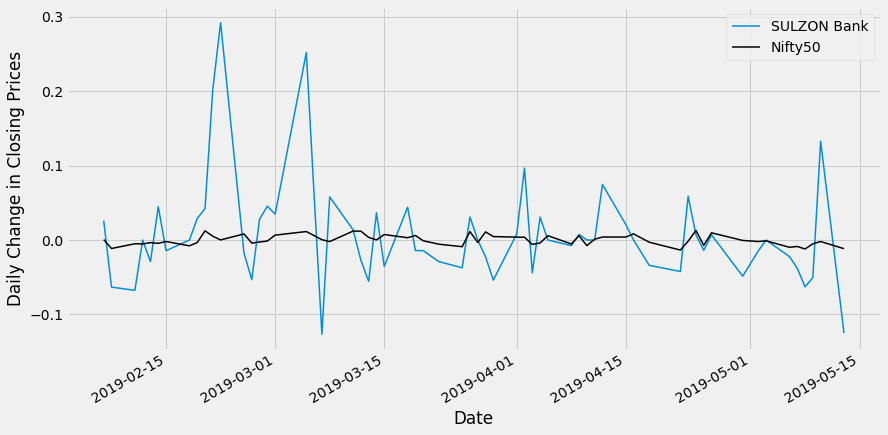

In [18]:
with plt.style.context('fivethirtyeight'):
    sulzon_daily_return.plot(figsize=(13,7),label='SULZON Bank', linewidth=1.5)
    nifty_daily_return.plot(color='k', figsize=(13,7), label='Nifty50', linewidth=1.5)
    plt.ylabel("Daily Change in Closing Prices")
    plt.legend()
    plt.show()

In [19]:
sulzon_daily_return = sulzon_daily_return.ravel().reshape(-1,1)
nifty_daily_return = nifty_daily_return.ravel().reshape(-1,1)

In [20]:
daily_beta_regressor = LinearRegression()
daily_beta_regressor.fit(nifty_daily_return, sulzon_daily_return)

LinearRegression()

In [21]:
daily_beta_regressor.coef_.item()


3.4868570632863847

In [23]:
import os
months = 3
days = months * 21
nifty_stock = pd.read_csv("./stock_data/Nifty50.csv").tail(days)
nifty_stock.Date = pd.to_datetime(nifty_stock.Date)
nifty_stock = nifty_stock.set_index('Date')
minn = 0
minn_stock = ''
maxx = 0
maxx_stock = ''
for file in os.listdir("./stock_data/"):
    sulzon_stock = pd.read_csv("./stock_data/"+file).tail(days)
    sulzon_stock.Date = pd.to_datetime(sulzon_stock.Date)
    sulzon_stock = sulzon_stock.set_index('Date')
    sulzon_daily_return = sulzon_stock['Close Price'].pct_change().dropna().ravel().reshape(-1,1)
    nifty_daily_return = nifty_stock.Close.pct_change().dropna().ravel().reshape(-1,1)
    daily_beta_regressor = LinearRegression()
    daily_beta_regressor.fit(nifty_daily_return, sulzon_daily_return)
    beta = daily_beta_regressor.coef_.item()
    if beta < minn:
        minn = beta
        minn_stock = sulzon_stock.Symbol[0]
    elif beta > maxx:
        maxx = beta
        maxx_stock = sulzon_stock.Symbol[0]
    print(sulzon_stock.Symbol[0]," : ", daily_beta_regressor.coef_.item(), "\n")

print("Maximum : ", maxx_stock," : ", maxx)
print("Minimum : ", minn_stock," : ", minn)


ADANIPORTS  :  0.7514023618074727 

ADANIPORTS  :  0.7514023618074727 

ADANIPOWER  :  2.0324485166666686 

AJANTPHARM  :  0.7644861800825175 

AMARAJABAT  :  0.8454659155497127 

APOLLOTYRE  :  1.2067788716607342 

ASHOKA  :  1.653274893512687 

ASIANPAINT  :  0.7433300326987932 

AXISBANK  :  0.8969708964273772 

BAJAJELEC  :  1.5812125267239843 

BAJFINANCE  :  1.0050738793567981 

BERGEPAINT  :  0.9085547104337387 

BOMDYEING  :  2.0189600901553613 

BPCL  :  1.030279724989263 

CASTROLIND  :  0.6452496978373226 

CENTURYPLY  :  1.5830036001817103 

CIPLA  :  0.256003678280332 

CUMMINSIND  :  1.1905455197205908 

DHFL  :  -3.2583451492584437 

DRREDDY  :  0.45136029822032964 

EICHERMOT  :  0.7839918230241059 

EXIDEIND  :  1.0567306799479226 

FORTIS  :  0.48964451313609536 

GAIL  :  1.2307818959935017 

GMRINFRA  :  1.604833628431758 

GODREJIND  :  0.9625668179471562 



KeyError: 'Close Price'

In [24]:
close_prices= pd.concat([sulzon['Date'],sulzon['Close Price'],nifty['Close']],axis=1)
close_prices.columns = ['Date','SULZON', 'Nifty']
close_prices.head()


,Date,SULZON,Nifty
0,15-May-2017,19.6,9445.40
1,16-May-2017,19.7,9512.25
2,17-May-2017,19.9,9525.75
3,18-May-2017,20.0,9429.45
4,19-May-2017,20.6,9427.90


In [25]:
close_prices.Date =  pd.to_datetime(close_prices.Date)
close_prices['monthwise'] = pd.to_datetime(close_prices['Date']).dt.to_period('M')
monthly_data=close_prices.groupby(['monthwise']).mean()
monthly_data


,SULZON,Nifty
monthwise,,
2017-05,19.657692,9498.557692
2017-06,18.861905,9606.954762
2017-07,18.911905,9850.119048
2017-08,16.819048,9901.183333
2017-09,16.447619,9977.916667
2017-10,15.705000,10138.677500
2017-11,14.763636,10324.754545
2017-12,14.090000,10322.262500
2018-01,15.440909,10771.154545


In [26]:
close_prices_monthly_change = monthly_data.pct_change(fill_method='ffill')*100
close_prices_monthly_change = close_prices_monthly_change.dropna(axis=0)
close_prices_monthly_change.shape

(24, 2)

In [27]:
X = close_prices_monthly_change.Nifty.ravel().reshape(-1,1)
y = close_prices_monthly_change.SULZON.ravel().reshape(-1,1)

In [28]:
monthly_beta_regressor = LinearRegression()
monthly_beta_regressor.fit(X,y)

LinearRegression()

In [29]:
monthly_beta_regressor.coef_.item()


2.700480036565816

In [30]:
from statsmodels import api as sm

In [31]:
model = sm.OLS(X, y).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.143
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              3.825
Date:                Mon, 08 Feb 2021   Prob (F-statistic):                      0.0628
Time:                        18:13:15   Log-Likelihood:                         -57.117
No. Observations:                  24   AIC:                                      116.2
Df Residuals:                      23   BIC:                                      117.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0683      0.035      1.956      0.063      -0.004       0.140
==============================================================================
Omnibus:                       18.944   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.609
Skew:                          -1.647   Prob(JB):                     4.53e-06
Kurtosis:                       6.709   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:

df = pd.concat([sulzon['Close Price'], nifty['Close']], axis=1)
df.columns = ['sulzon', 'NIFTY']
df.head()

,sulzon,NIFTY
0,19.6,9445.40
1,19.7,9512.25
2,19.9,9525.75
3,20.0,9429.45
4,20.6,9427.90


In [42]:
monthly_returns = df.pct_change(1).dropna(axis=0)
x = monthly_returns['sulzon']
y = monthly_returns['NIFTY']

In [43]:
X1 = sm.add_constant(x)

In [44]:
model = sm.OLS(y, X1)

In [45]:

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  NIFTY   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     47.46
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           1.73e-11
Time:                        18:24:39   Log-Likelihood:                 1755.6
No. Observations:                 493   AIC:                            -3507.
Df Residuals:                     491   BIC:                            -3499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.508      0.1